In [4]:
import numpy as np
import pandas as pd
import os
import cv2

directory = 'CK+48'
dir_list = os.listdir(directory)
image_data_list = []
labels = []
emotions = []
l = 0

for data_dir in dir_list:
    # Check if the item is a directory
    if os.path.isdir(os.path.join(directory, data_dir)):
        data_list = os.listdir(os.path.join(directory, data_dir))
        for img in data_list:
            input_img = cv2.imread(os.path.join(directory, data_dir, img))
            input_img = cv2.resize(input_img, (48, 48))
            image_data_list.append(input_img)
            labels.append(l)
        print('Loaded images from ' + data_dir)
        emotions.append(data_dir)
        l += 1

img_data = np.array(image_data_list)
img_data = img_data / 255.0
img_data.shape


Loaded images from happy
Loaded images from contempt
Loaded images from fear
Loaded images from surprise
Loaded images from sadness
Loaded images from anger
Loaded images from disgust


(981, 48, 48, 3)

In [5]:
print(emotions)
def getLabel(id):
    return emotions[id]

['happy', 'contempt', 'fear', 'surprise', 'sadness', 'anger', 'disgust']


In [6]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
num_classes=7
Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_test, y_train, y_test = train_test_split(img_data, Y, test_size=0.2,shuffle=True)
X_train.shape

(784, 48, 48, 3)

[1. 0. 0. 0. 0. 0. 0.]


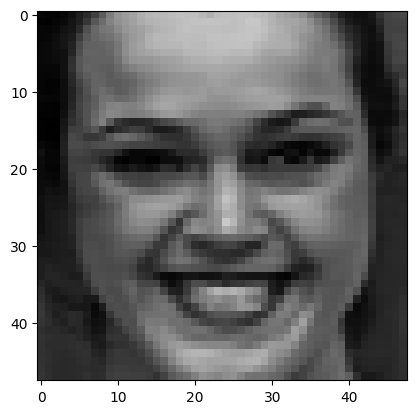

In [7]:
from matplotlib import pyplot as plt
print(y_train[499])
plt.imshow(X_train[499])
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.metrics import categorical_accuracy

from keras.metrics import categorical_accuracy

model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(48,48,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Epoch 1/250
25/25 [==============================] - 13s 504ms/step - loss: 1.9231 - accuracy: 0.2181 - val_loss: 1.8989 - val_accuracy: 0.2437
Epoch 2/250
25/25 [==============================] - 12s 474ms/step - loss: 1.8758 - accuracy: 0.2194 - val_loss: 1.8877 - val_accuracy: 0.2437
Epoch 3/250
25/25 [==============================] - 11s 459ms/step - loss: 1.8793 - accuracy: 0.2347 - val_loss: 1.8747 - val_accuracy: 0.1777
Epoch 4/250
25/25 [==============================] - 12s 472ms/step - loss: 1.8659 - accuracy: 0.2309 - val_loss: 1.8555 - val_accuracy: 0.2437
Epoch 5/250
25/25 [==============================] - 12s 465ms/step - loss: 1.7445 - accuracy: 0.2666 - val_loss: 1.5970 - val_accuracy: 0.3706
Epoch 6/250
25/25 [==============================] - 12s 483ms/step - loss: 1.5053 - accuracy: 0.3916 - val_loss: 1.4089 - val_accuracy: 0.4670
Epoch 7/250
25/25 [==============================] - 11s 460ms/step - loss: 1.4061 - accuracy: 0.4018 - val_loss: 1.3831 - val_accuracy:

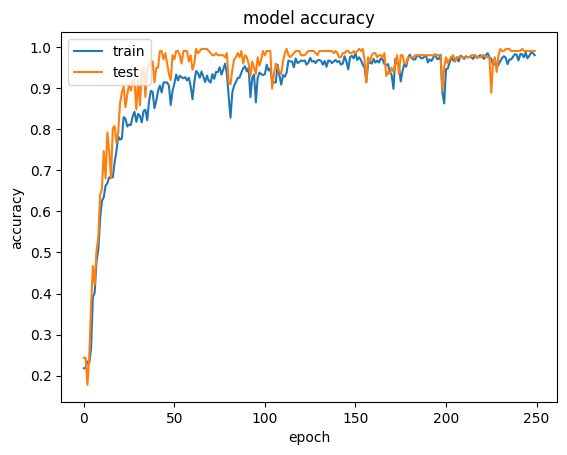

In [10]:
import matplotlib.pyplot as plt
history=model.fit(X_train, y_train,epochs=250,validation_data=(X_test, y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")

Final Training Accuracy: 0.9796
Final Validation Accuracy: 0.9898


In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss:{test_loss}")

7/7 [==============================] - 1s 65ms/step - loss: 0.0426 - accuracy: 0.9898
Test Accuracy: 0.9898
Test Loss:0.042566221207380295
